In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000092230"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000092230
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,BB&T CORP
Ticker,BBT


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,20.0,2.517100e+01,1.760822e+00,22.76,2.376750e+01,2.467500e+01,2.694750e+01,2.852000e+01
interest income,41.0,1.702629e+09,3.149947e+08,1780000.00,1.643000e+09,1.745000e+09,1.805000e+09,2.173000e+09
net income,43.0,4.592533e+08,2.250926e+08,2776000.00,2.450000e+08,5.330000e+08,5.985000e+08,8.390000e+08
net interest income,43.0,1.347336e+09,3.990857e+08,1436000.00,1.318500e+09,1.416000e+09,1.587000e+09,1.705000e+09
provision for loan losses,43.0,2.716478e+08,2.818899e+08,68000.00,1.010000e+08,1.480000e+08,3.005000e+08,1.345000e+09


# Plots

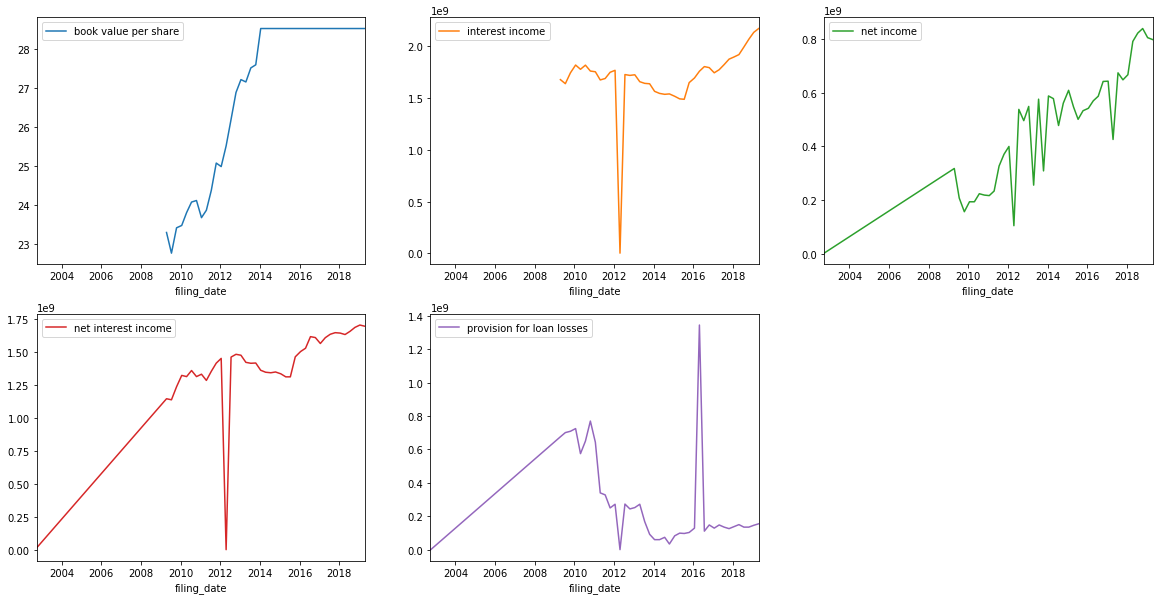

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000092230 book value per share       2002Q2 to 2008Q4: 27 periods    missing   
           book value per share       2014Q1 to 2019Q1: 21 periods    missing   
           interest income            2002Q2 to 2008Q4: 27 periods    missing   
           net income                                       2002Q2  duplicate   
           net income                 2002Q3 to 2008Q4: 26 periods    missing   
           net interest income                              2002Q2  duplicate   
           net interest income        2002Q3 to 2008Q4: 26 periods    missing   
           provision for loan losses                        2002Q2  duplicate   
           provision for loan losses  2002Q3 to 2008Q4: 26 periods    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000092230 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net interest income          Duplicate period  
           net interest income            Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()